# Unsupervised learning

## K-Means clustering
![alt text](https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png)

Read more
* https://www.superdatascience.com/blogs/self-organizing-maps-soms-extra-k-means-clustering-part-3/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

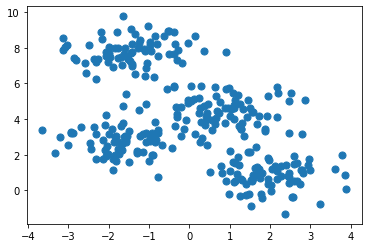

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);11
plt.show()

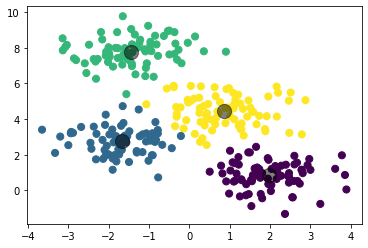

Centroids
[[ 1.97899828  0.83487115]
 [-1.65917487  2.7607673 ]
 [-1.44074146  7.78059306]
 [ 0.85491787  4.44098171]]


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
print('Centroids', centers, sep='\n')

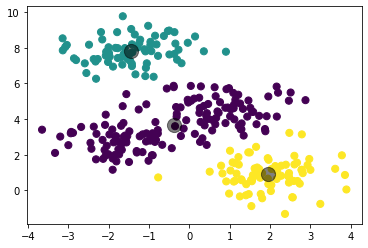

Centroids
[[-0.37269409  3.68742579]
 [-1.439055    7.81367705]
 [ 1.96036715  0.8944478 ]]


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
print('Centroids', centers, sep='\n')

### finding best cluster

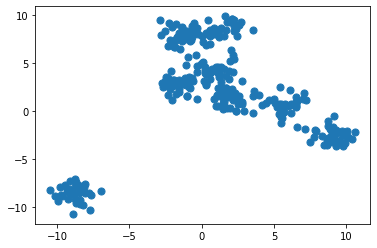

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=8,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);11
plt.show()

### elbow method and Silhouette score

For n_clusters = 4 The average silhouette_score is : 0.589738519529238
For n_clusters = 5 The average silhouette_score is : 0.5793149220932733
For n_clusters = 6 The average silhouette_score is : 0.5743851347631377
For n_clusters = 7 The average silhouette_score is : 0.5600911929009983
For n_clusters = 8 The average silhouette_score is : 0.5914087441834297
For n_clusters = 9 The average silhouette_score is : 0.5601200018172094
For n_clusters = 10 The average silhouette_score is : 0.5183564079697408


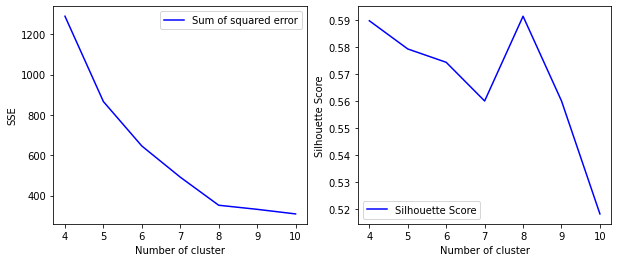

Best n_clusters =  8 with Silhouette score is :  0.5914087441834297


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [4, 5, 6, 7 ,8, 9, 10]
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X , cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

print('Best n_clusters = ', range_n_clusters[ss.index(max(ss))], 'with Silhouette score is : ', max(ss))

![alt text](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/58_blog_image_8.png)

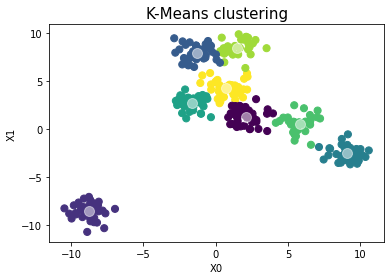

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 8)
cluster_labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], s=50, c=cluster_labels)
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=100, alpha=0.5)

plt.title('K-Means clustering', fontsize = 15)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

## Mean-shift clustering

reference: Dorin Comaniciu and Peter Meer, “Mean Shift: A robust approach toward feature space analysis”. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.

![alt text](https://latools.readthedocs.io/en/latest/_images/3-clustering-example.png)

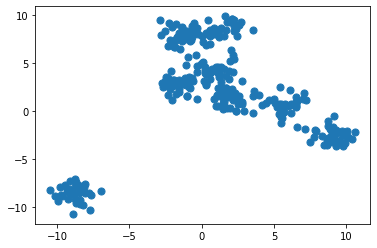

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=8,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);11
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=50)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


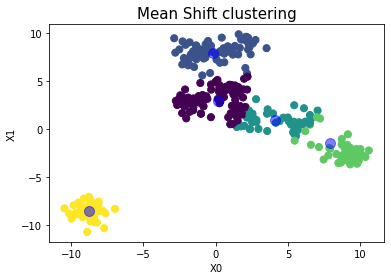

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', s=100, alpha=0.5)

plt.title('Mean Shift clustering', fontsize = 15)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()